In [ ]:
from datasets import load_dataset
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from urllib.parse import urlparse

sns.set_theme("notebook")

# Translation of terms

| Polish term                     | English translation                                                                                                                                                     |
|----------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                               | id                                                                                                                                                                     |
| Sygnatura                        | Docket number                                                                                                                                                          |
| Powołane przepisy                | The cited provisions                                                                                                                                                   |
| Sygn. powiązane                  | Related docket numbers                                                                                                                                                 |
| Sędziowie                        | Judges                                                                                                                                                                 |
| Data orzeczenia                  | The day of the judgment                                                                                                                                               |
| Rodzaj orzeczenia                | Type of decision                                                                                                                                                       |
| przewodniczący                   | Presiding judge                                                                                                                                                        |
| sprawozdawca                     | Judge rapporteur                                                                                                                                                       |
| ustawa                           | Law                                                                                                                                                                    |
| dziennik_ustaw                   | Journal of laws                                                                                                                                                        |
| art                              | Article                                                                                                                                                                |
| Data wpływu                      | Date of submission                                                                                                                                                     |
| Sąd                              | Court                                                                                                                                                                  |
| Symbol z opisem                  | Type of case with the detailed description                                                                                                                             |
| Hasła tematyczne                 | Keywords                                                                                                                                                               |
| Skarżony organ                   | Challenged authority                                                                                                                                                   |
| Treść wyniku                     | Nature of the verdict                                                                                                                                                  |
| Publikacja w u.z.o.              | Published in official collection of judgments Jurisprudence of the Voivodeship Administrative Courts and the Supreme Administrative Court                                |
| Info. o glosach                  | Information on glosa(s)                                                                                                                                                |
| Sentencja                        | Sentence of the judgment                                                                                                                                               |
| Uzasadnienie                     | Reasons for judgment                                                                                                                                                   |
| Tezy                             | Theses                                                                                                                                                                 |
| Zdanie odrębne                   | Dissenting opinion                                                                                                                                                     |
| Prawomocność                     | Finality                                                                                                                                                               |


In [ ]:
df = load_dataset("JuDDGES/nsa")["train"].to_polars()
print(f"#rows={len(df):,}")

Resolving data files:   0%|          | 0/43 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/42 [00:00<?, ?it/s]

#rows=2,114,269


In [ ]:
df.describe()

statistic,id,Docket number,Type of decision,Finality,The day of the judgment,Date of submission,Court,Judges,Presiding judge,Judge rapporteur,Type of case with the detailed description,Keywords,Related docket numbers,Challenged authority,Nature of the verdict,The cited provisions,Published in official collection of judgments Jurisprudence of the Voivodeship Administrative Courts and the Supreme Administrative Court,Information on glosa(s),Theses,Sentence of the judgment,Reasons for judgment,Dissenting opinion
str,str,str,str,str,str,str,str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,str,str,str,str
"""count""","""2114269""","""2114258""","""2114269""","""1688612""","""2114269""","""2090769""","""2114269""",2.104118e6,"""2100513""","""2100513""",2.095581e6,1.676115e6,813614.0,"""2087300""",2.057626e6,1.68514e6,6587.0,1898.0,"""36953""","""2106207""","""1831888""","""1392"""
"""null_count""","""0""","""11""","""0""","""425657""","""0""","""23500""","""0""",10151.0,"""13756""","""13756""",18688.0,438154.0,1.300655e6,"""26969""",56643.0,429129.0,2.107682e6,2.112371e6,"""2077316""","""8062""","""282381""","""2112877"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""/doc/000001239…","""1/III SA 1194/…","""NSA""","""orzeczenie nie…","""1981-01-07""","""1992-05-18""","""NSA oz. w Biał…",null,"""A. Beata Jezie…","""- -""",null,null,null,"""Agencja Mienia…",null,null,null,null,""""" (...) w pew…","""! Dnia 22 lipc…","""! FSK 187/05 …","""(uzasadnienie)…"
"""25%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""max""","""/doc/FFFFFE895…","""W 9/94""","""Wyrok WSA we W…","""orzeczenie pra…","""2024-09-27""","""2024-09-20""","""Wojewódzki Sąd…",null,"""Żyznowski Tade…","""Żyznowski Tade…",null,null,null,"""Zespół do Spra…",null,null,null,null,"""…) materialno-…","""﻿sygn. akt II …","""﻿sygn. akt II …","""﻿Sygn. akt II …"


In [ ]:
assert df["id"].n_unique() == len(df)

In [ ]:
def get_null_count(col: str):
    return df.select(pl.col(col).null_count().alias("null_count")).with_columns((pl.col("null_count") / len(df)).alias("null_ratio"))

# Example

In [ ]:
dict(zip(df.columns, df.row(0)))

{'id': '/doc/BC8847077B',
 'Docket number': 'II SA/Ol 1164/16',
 'Type of decision': 'Postanowienie WSA w Olsztynie',
 'Finality': 'orzeczenie prawomocne',
 'The day of the judgment': '2016-10-26',
 'Date of submission': '2016-09-21',
 'Court': 'Wojewódzki Sąd Administracyjny w Olsztynie',
 'Judges': ['S. Beata Jezielska'],
 'Presiding judge': 'S. Beata Jezielska',
 'Judge rapporteur': 'S. Beata Jezielska',
 'Type of case with the detailed description': ['6042 Gry losowe i zakłady wzajemne'],
 'Keywords': ['Odrzucenie skargi'],
 'Related docket numbers': None,
 'Challenged authority': 'Dyrektor Izby Celnej',
 'Nature of the verdict': ['Odrzucono skargę'],
 'The cited provisions': [{'Article': 'art. 220 par.3, art. 58 par.3',
   'Journal of laws': 'Dz.U. 2016 poz 718',
   'Law': 'Ustawa z dnia 30 sierpnia 2002 r. - Prawo o postępowaniu przed sądami administracyjnymi - tekst jednolity',
   'Link': 'http://isap.sejm.gov.pl/DetailsServlet?id=WDU20160000718'}],
 'Published in official colle

# 01. `Docket number`
* we have 11 null values in `Docket number` - recommend to remove
* most of rows follows the same `Docker number` 3-part pattern (e.g. `II SA/Ol 1164/16`) pattern, but there are many rows having it 2-part (e.g. `SA/Bk 1587/03`) - is that okay?

In [ ]:
# df.with_columns(pl.col("Docket number").str.split(" ").list.len().alias("docket_parts_count")).filter(pl.col("docket_parts_count").ne(3))
df.select(pl.col("Docket number").str.split(" ").list.len().value_counts().alias("docket_parts_count_dist"))

docket_parts_count_dist
struct[2]
"{4,6}"
"{0,11}"
"{2,19686}"
"{3,2094566}"


In [ ]:
df.select(pl.col("Keywords").list.explode().str.to_lowercase().str.strip_chars().value_counts(sort=True)) #.to_dicts()

Keywords
struct[2]
"{null,438154}"
"{""odrzucenie skargi"",229322}"
"{""prawo pomocy"",186823}"
"{""inne"",130255}"
"{""administracyjne postępowanie"",100997}"
…
"{""użytkowaniw wieczyste"",1}"
"{""prawo własności, własność czasowa"",1}"
"{""służby mundurowe"",1}"


In [ ]:
df.select(pl.col("Docket number").str.to_lowercase().str.strip_chars().is_unique().mean())

Docket number
f64
0.687406


# 02. `Type of decision`
* typ decyzji zawiera informacje również o sądzie, trzeba dodatkowo parsować (mozna nawet ręcznie - tylko 91 wartości unikalnych)

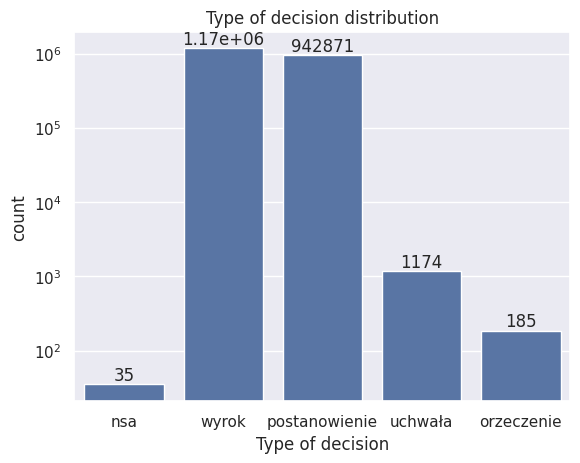

In [ ]:
# df.select(pl.col("Type of decision").value_counts(sort=True))
dec_type = df.select(pl.col("Type of decision").str.split(" ").list.first().str.to_lowercase().str.strip_chars().value_counts().alias("count"))
ax = sns.barplot(data=dec_type.unnest("count"), x="Type of decision", y="count", errorbar=None)
ax.set(title="Type of decision distribution", yscale="log")
ax.bar_label(ax.containers[0]) # only 1 container needed unless using `hue`
plt.show()

# 03. `Finality`
* to może być zmienna kategoryczna
* dlaczego są brakujące wartości (czy orzeczenie może być ani prawomocne ani nieprawomocne)?

In [ ]:
df.select(pl.col("Finality").value_counts(sort=True).alias("count")).unnest("count")

Finality,count
str,u32
"""orzeczenie pra…",1537418
null,425657
"""orzeczenie nie…",151194


In [ ]:
# df.filter(pl.col("Finality").is_null())

# 04. `The day of the judgment`
* ciekawie będzie tą periodyczność przeanalizować, z czego to wynika?

In [ ]:
# df.select(pl.col("The day of the judgment").null_count())

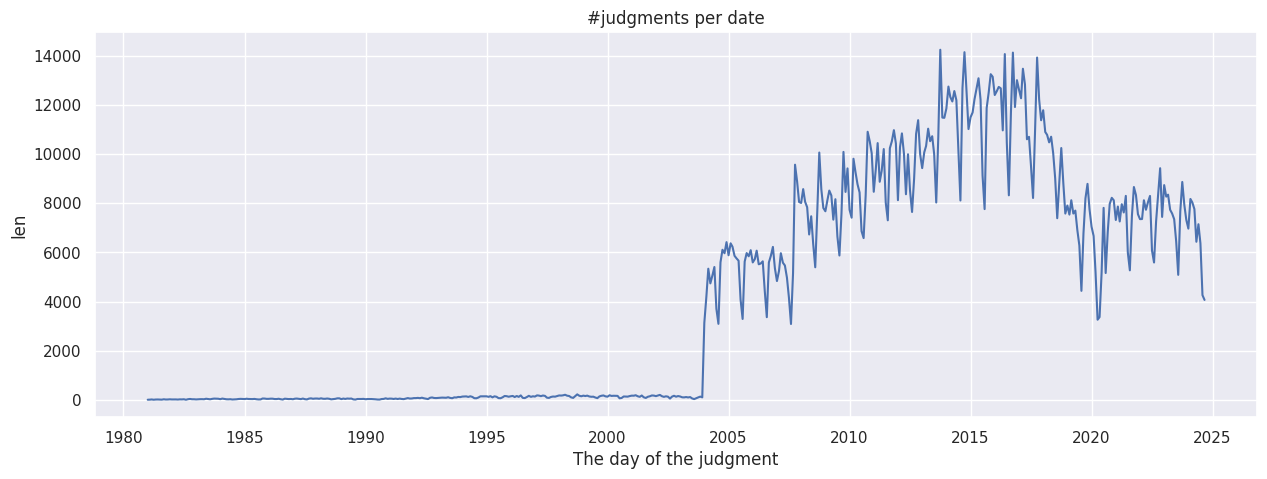

In [ ]:
judgment_date = df.select(pl.col("The day of the judgment").str.to_date()).sort("The day of the judgment").group_by_dynamic("The day of the judgment", every="1mo").agg(pl.len())

_, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.lineplot(data=judgment_date, x="The day of the judgment", y="len", ax=ax)
ax.set(title="#judgments per date")
plt.show()

In [ ]:
# judgment_date = (
#     df.select(pl.col("The day of the judgment").str.to_date())
#     .sort("The day of the judgment")
#     .group_by_dynamic("The day of the judgment", every="1mo")
#     .agg(pl.len())
# )

# judgment_without_submissions = (
#     df.filter(pl.col("Date of submission").is_null())
#     .select(pl.col("The day of the judgment").str.to_date())
#     .sort("The day of the judgment")
#     .group_by_dynamic("The day of the judgment", every="1mo")
#     .agg(pl.len())
# )

# _, ax = plt.subplots(1, 1, figsize=(15, 5))
# sns.lineplot(data=judgment_date, x="The day of the judgment", y="len", ax=ax, label="w\\")
# sns.lineplot(data=judgment_without_submissions, x="The day of the judgment", y="len", ax=ax, label="w\\o")
# ax.set(title="#judgments per date", yscale="log")
# plt.show()

# 05. `Date of submission`
* 1% wierszy nie ma submission date
* brakujące submission date jest głównie dla wyroków sprzed 2005 (na podstawie kolumny `The day of the judgement`), później trafia się to sporadycznie (raz na rok albo rzadziej)


In [ ]:
df.select(pl.col("Date of submission").str.to_date().null_count().alias("null_count")).with_columns(
    (pl.col("null_count") / len(df)).alias("null_ratio")
)

null_count,null_ratio
u32,f64
23500,0.011115


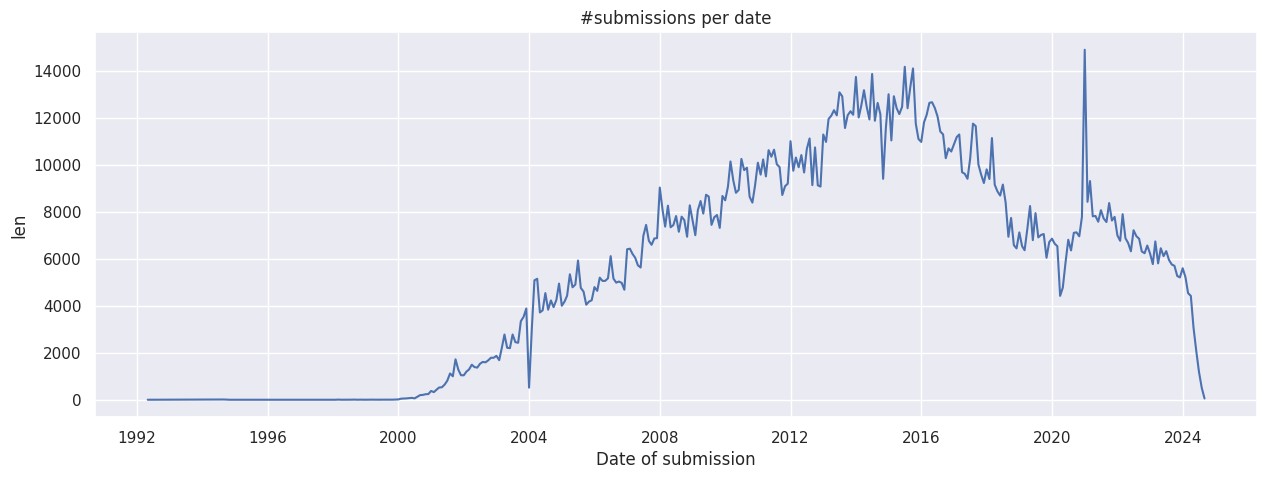

In [ ]:
submission_date = (
    df.select(pl.col("Date of submission").str.to_date())
    .filter(pl.col("Date of submission").is_not_null())
    .sort("Date of submission")
    .group_by_dynamic("Date of submission", every="1mo")
    .agg(pl.len())
)

_, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.lineplot(data=submission_date, x="Date of submission", y="len", ax=ax)
ax.set(title="#submissions per date")
plt.show()

# 06. `Court`
* brak brakujących wartości
* można dać indykator, czy naczelny sąd czy wojewódzki

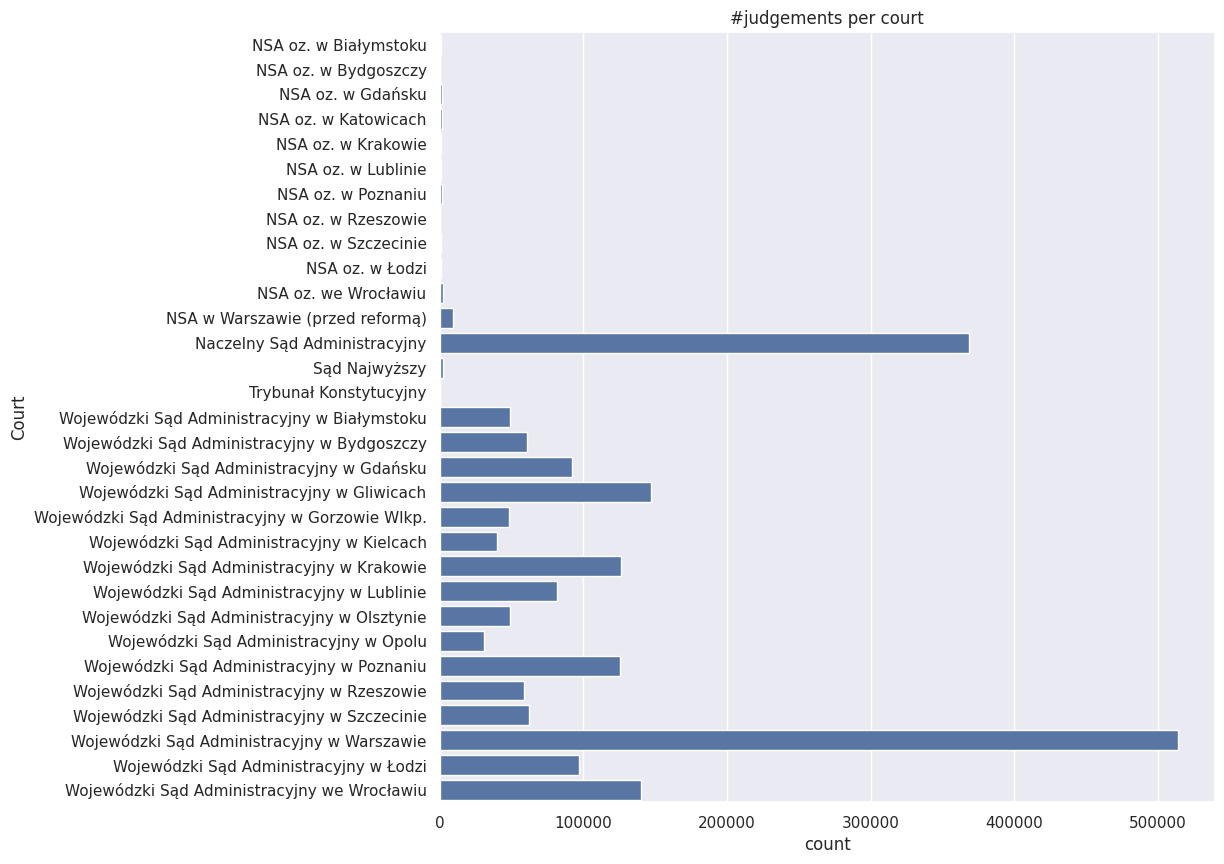

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.barplot(data=df.select(pl.col("Court").value_counts()).sort("Court").unnest("Court"), x="count", y="Court", ax=ax)
ax.set(title="#judgements per court")
plt.show()

# 07. `Judges`
* 0.4% of rows have missing `Judges`

In [ ]:
df.select(pl.col("Judges").list.len().eq(0).sum().alias("null_count")).with_columns((pl.col("null_count") / len(df)).alias("null_ratio"))

null_count,null_ratio
u32,f64
10151,0.004801


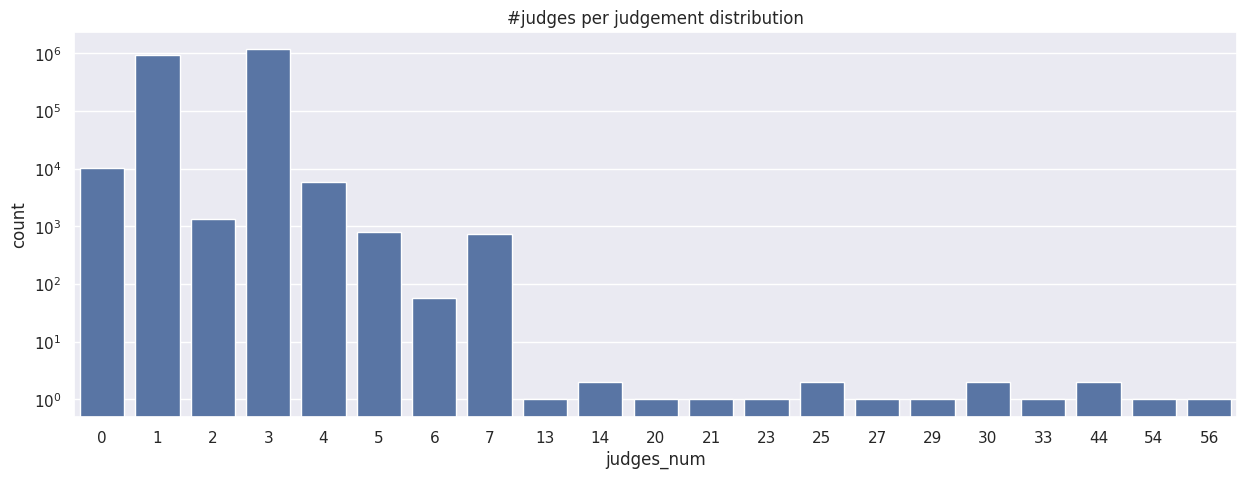

In [ ]:
_, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(data=df.select(pl.col("Judges").list.len().alias("judges_num").value_counts()).unnest("judges_num").sort("judges_num"), x="judges_num", y="count", ax=ax)
ax.set(yscale="log", title="#judges per judgement distribution")
plt.show()

[Text(0.5, 1.0, '#judges per judgements in Courts')]

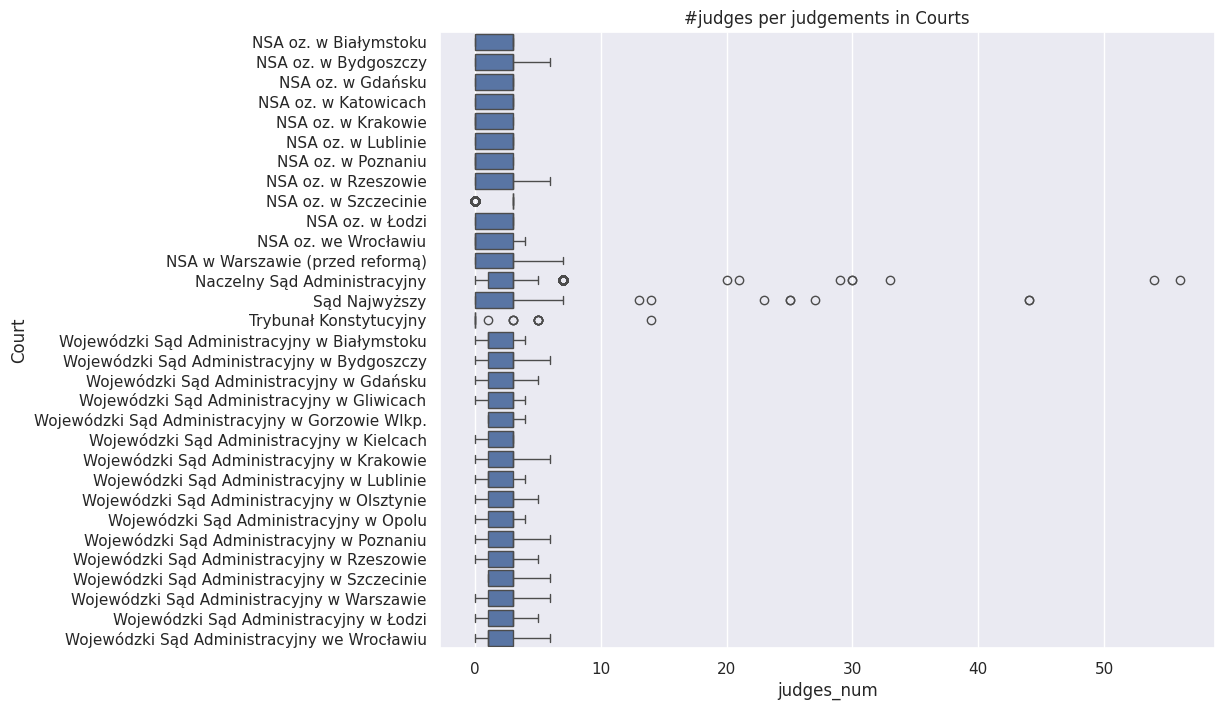

In [ ]:
_, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(data=df.select(pl.col("Judges").list.len().alias("judges_num"), pl.col("Court")).sort("Court"), x="judges_num", y="Court")
ax.set(title="#judges per judgements in Courts")

# 08. `Presiding judge`
* 0.6% null values
* `Presiding judge` is always in `Judges` (except for cases when `Presiding judge` is null). When there is no `Judges` also there is always no `Presiding judge`

In [ ]:
get_null_count("Presiding judge")

null_count,null_ratio
u32,f64
13756,0.006506


In [ ]:
is_always_in_judges = df.filter(pl.col("Presiding judge").is_not_null()).select(pl.col("Presiding judge").is_in(pl.col("Judges")).all()).item()
is_always_in_judges

True

In [ ]:
has_presiding_judge_when_no_juddges = df.filter(pl.col("Presiding judge").is_not_null()).select(pl.col("Judges").is_null().any()).item()
has_presiding_judge_when_no_juddges

False

# 09. `Judge rapporteur`
* 0.6% null values
* `Judge rapporteur` is always in `Judges` (except for cases when `Judge rapporteur` is null). When there is no `Judges` also there is always no `Judge rapporteur`
* missingness fully correlates with `Presiding judge`

In [ ]:
get_null_count("Judge rapporteur")

null_count,null_ratio
u32,f64
13756,0.006506


In [ ]:
is_always_in_judges = df.filter(pl.col("Judge rapporteur").is_not_null()).select(pl.col("Judge rapporteur").is_in(pl.col("Judges")).all()).item()
is_always_in_judges

True

In [ ]:
has_presiding_judge_when_no_juddges = df.filter(pl.col("Judge rapporteur").is_not_null()).select(pl.col("Judges").is_null().any()).item()
has_presiding_judge_when_no_juddges

False

In [ ]:
no_rapporteur_when__presiding = df.select((pl.col("Judge rapporteur").is_null() & pl.col("Presiding judge").is_not_null()).sum()).item()
no_presiding_when_rapporteur = df.select((pl.col("Judge rapporteur").is_not_null() & pl.col("Presiding judge").is_null()).sum()).item()
no_presidiing_when_no_rapporteur = df.select((pl.col("Judge rapporteur").is_null() & pl.col("Presiding judge").is_null()).sum()).item()
no_rapporteur_when__presiding, no_presiding_when_rapporteur, no_presidiing_when_no_rapporteur

(0, 0, 13756)

# 10.  `Type of case with the detailed description`
* 0.8% missing values

In [ ]:
get_null_count("Type of case with the detailed description")

null_count,null_ratio
u32,f64
18688,0.008839


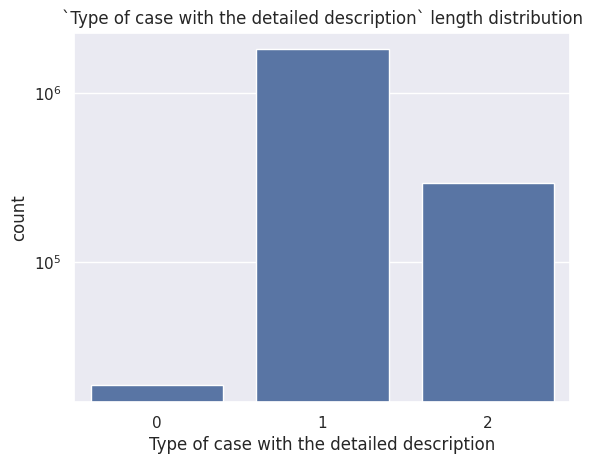

In [ ]:
ax = sns.barplot(
    data=df.select(
        pl.col("Type of case with the detailed description")
        .list.len()
        .value_counts()
    ).unnest("Type of case with the detailed description"),
    x="Type of case with the detailed description",
    y="count"
)
ax.set(yscale="log", title="`Type of case with the detailed description` length distribution")
plt.show()

In [ ]:
type_ids = df.select(
    pl.col("id"),
    pl.col("Type of case with the detailed description")
    .map_elements(lambda item: [x.split(maxsplit=1)[0] for x in item])
).explode("Type of case with the detailed description")

In [ ]:
type_ids = type_ids.with_columns(pl.col("Type of case with the detailed description").cast(pl.Int32, strict=False).alias("type_id"))

In [ ]:
type_ids.select(pl.col("type_id").value_counts(sort=True)).unnest("type_id")

type_id,count
i32,u32
6110,187552
6112,106020
658,94553
6111,86538
6329,83622
…,…
6609,3
6233,2
656,1


# 11. `Keywords`
* High ratio of null values

In [ ]:
get_null_count("Keywords")

null_count,null_ratio
u32,f64
438154,0.207237


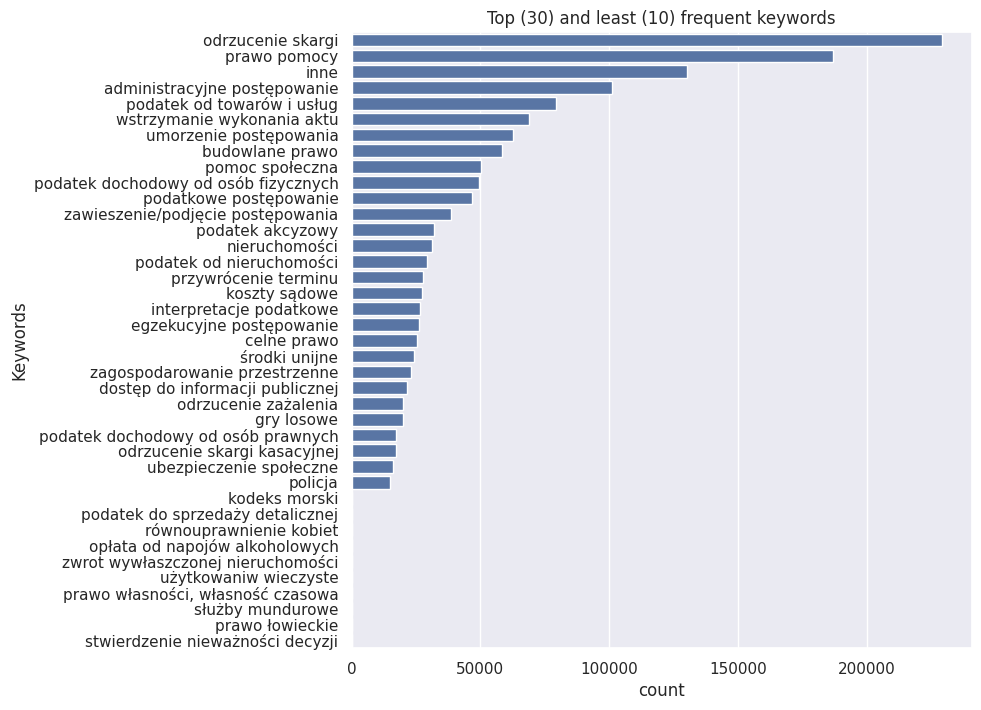

In [ ]:
keywords_count = df.select(pl.col("Keywords").list.explode().str.to_lowercase().str.strip_chars().value_counts(sort=True)).unnest("Keywords")

_, ax = plt.subplots(1, 1, figsize=(8, 8))
most_n, least_n = 30, 10
ax = sns.barplot(data=pl.concat([keywords_count.head(most_n), keywords_count.tail(least_n)]), x="count", y="Keywords", ax=ax)
ax.set(title=f"Top ({most_n}) and least ({least_n}) frequent keywords")
plt.show()

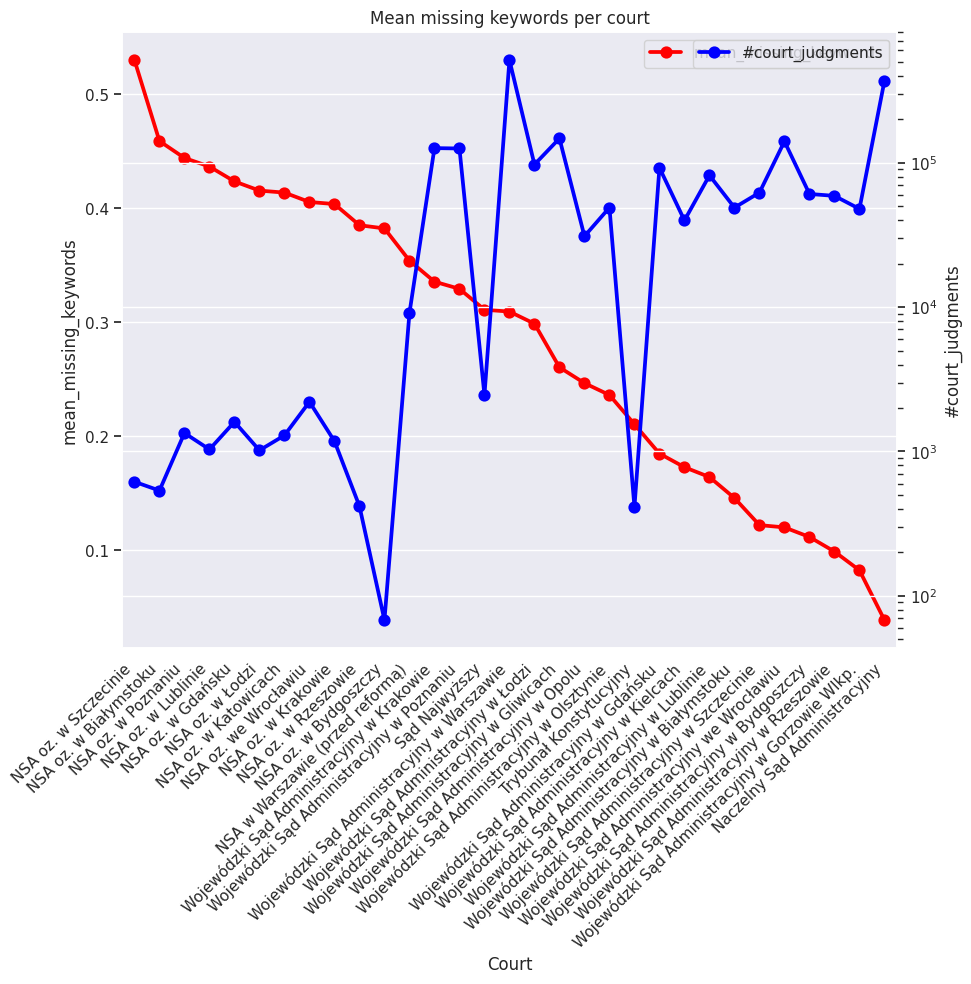

In [ ]:
missing_keywords_by_court = df.select(
    pl.col("Court"), pl.col("Keywords").is_null().alias("no_keywords").cast(pl.Int32)
).group_by("Court").agg(pl.col("no_keywords").mean().alias("mean_missing_keywords"), pl.len().alias("#court_judgments")).sort(
    by="mean_missing_keywords", descending=True
)

_, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.pointplot(data=missing_keywords_by_court, y="mean_missing_keywords", x="Court", color="red", label="mean_missing_keywords", ax=ax)
plt.xticks(rotation=45, ha='right')
ax2 = plt.twinx()
ax = sns.pointplot(data=missing_keywords_by_court, y="#court_judgments", x="Court", ax=ax2, label="#court_judgments", color="blue")
ax.set(title="Mean missing keywords per court", yscale="log")
plt.show()

# 12. `Related docket numbers`

In [ ]:
get_null_count("Related docket numbers")

null_count,null_ratio
u32,f64
1300655,0.61518


# 13. `Challenged authority`

In [ ]:
get_null_count("Challenged authority")

null_count,null_ratio
u32,f64
26969,0.012756


In [ ]:
df.select(pl.col("Challenged authority").value_counts(sort=True)).unnest("Challenged authority")

Challenged authority,count
str,u32
"""Samorządowe Ko…",447310
"""Dyrektor Izby …",270297
"""Dyrektor Izby …",209976
"""Wojewoda""",164441
"""Dyrektor Izby …",95455
…,…
"""Minister Rolni…",1
"""Wójt Gminy~Pro…",1
"""Minister Rozwo…",1


# 14. `Nature of the verdict`

In [ ]:
get_null_count("Nature of the verdict")

null_count,null_ratio
u32,f64
56643,0.026791


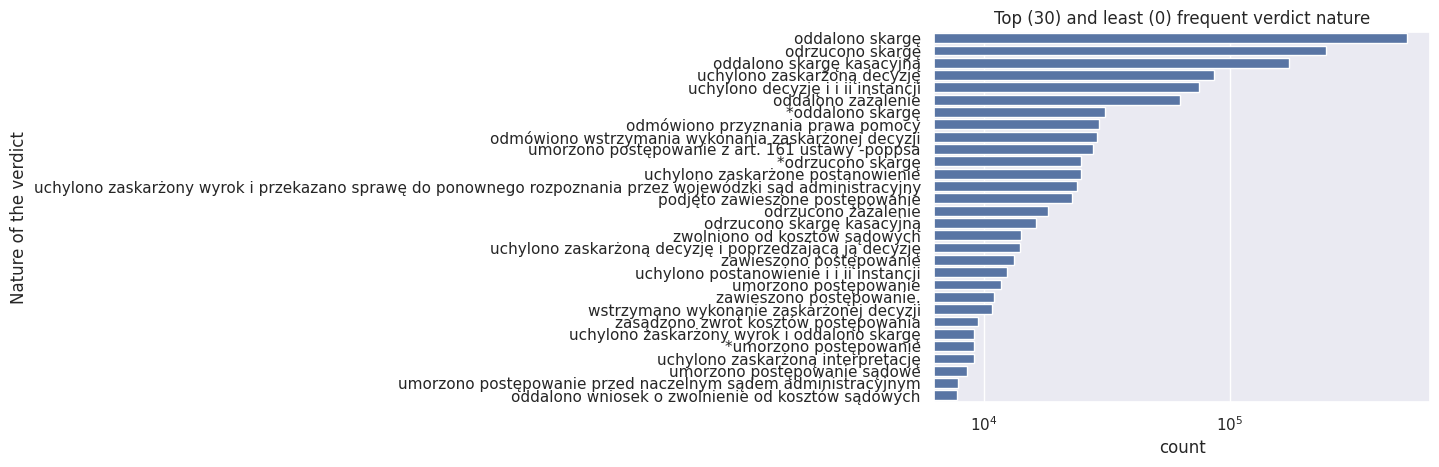

In [ ]:
verdict_nature = df.filter(pl.col("Nature of the verdict").is_not_null()).select(
    pl.col("Nature of the verdict").list.explode().str.to_lowercase().str.strip_chars().value_counts(sort=True)
).unnest("Nature of the verdict")

top, least = 30, 0
top_verdict_nature = pl.concat([verdict_nature.head(top), verdict_nature.tail(least)])
ax = sns.barplot(data=top_verdict_nature, x="count", y="Nature of the verdict")
ax.set(title=f"Top ({top}) and least ({least}) frequent verdict nature", xscale="log")
plt.show()

# 16. `Published in official collection of judgments Jurisprudence of the Voivodeship Administrative Courts and the Supreme Administrative Court`

In [ ]:
get_null_count("Published in official collection of judgments Jurisprudence of the Voivodeship Administrative Courts and the Supreme Administrative Court")

null_count,null_ratio
u32,f64
2107682,0.996885


# 17. `Information on glosa(s)`

In [ ]:
get_null_count("Information on glosa(s)")

null_count,null_ratio
u32,f64
2112371,0.999102


In [ ]:
df.filter(pl.col("Information on glosa(s)").is_not_null()).select(pl.col("Information on glosa(s)"))

Information on glosa(s)
list[str]
"[""Radwański Zbigniew Nowe Prawo 1984 nr 6 str. 132""]"
"[""Pawlak Wiktor Samorząd Terytorialny 1997 nr 5 str. 70""]"
"[""Mastalski Ryszard POP 1994 nr 6 poz. 102 str. 334""]"
"[""Zoll Fryderyk Przegląd Sejmowy 1997 nr 2 str. 170"", ""Niedośpiał Michał Państwo i Prawo 1997 nr 9 str. 106""]"
"[""Siemieński Feliks Państwo i Prawo 1993 nr 4 str. 98"", ""Jackowiak Czesław i"", ""Ziembiński Zygmunt Państwo i Prawo 1993 nr 6 str. 103""]"
…
"[""Cisek Andrzej i"", ""Zagrobelny Krzysztof OSP 1998 z. 7-8 poz. 132 str. 368""]"
"[""Miemiec Marcin Finanse Komunalne 1999 nr 2 str. 68""]"
"[""Szreniawski Jan i"", ""Wróbel Andrzej OSP 1992 z. 4 poz. 93 str. 189""]"


# 18. `Theses`
* there is only one thesis (the column is single string not a list)

In [ ]:
get_null_count("Theses")

null_count,null_ratio
u32,f64
2077316,0.982522


In [ ]:
# df.filter(pl.col("Theses").is_not_null()).select(pl.col("Theses")).head(30).to_dicts()

# 19. `Sentence of the judgment`
* kilka sentencji ma jakieś losowe znaki zamiast treści
* w niektórych sentencjach są uzasadnienia (na razie znalazłem sporo w tych, które są bardzo długie)

In [ ]:
get_null_count("Sentence of the judgment")

null_count,null_ratio
u32,f64
8062,0.003813


In [ ]:
sent_df = df.filter(pl.col("Sentence of the judgment").is_not_null()).with_columns(
    pl.col("Sentence of the judgment").str.len_chars().alias("sentence_len"),
)

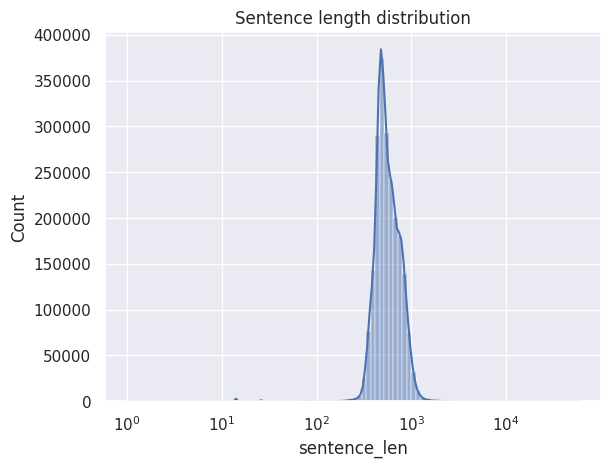

In [ ]:
ax = sns.histplot(sent_df.select(pl.col("sentence_len")), x="sentence_len", bins=100, kde=True, log_scale=True)
ax.set(title="Sentence length distribution")
plt.show()

In [ ]:
# sent_df.select(pl.col("Sentence of the judgment"), pl.col("sentence_len")).sort("sentence_len", descending=True).head(50).to_dicts()

# 20. `Reasons for judgment`
* w najkrótszych wyrokach są błędy (po około 100 najrótszych wyrokach zaczynają się już jakieś bardziej sensowne uzasadnienia):
    * info o błędzie parsowania
    * uzasadnienie jest odwołaniem do uzasadnienia w innym wyorku na podstawie sygnatury (w naszej bazie 68% uzasadnień ma unikalną sygnaturę)
* w przypadku, gdy dochodzi do "oczywistej pomyłki" w jakiejś sprawie jest tylko, uzasadnienie odwołuje się tylko do sentencji

In [ ]:
reason_df = df.filter(pl.col("Reasons for judgment").is_not_null()).with_columns(pl.col("Reasons for judgment").str.len_chars().alias("reason_len"))

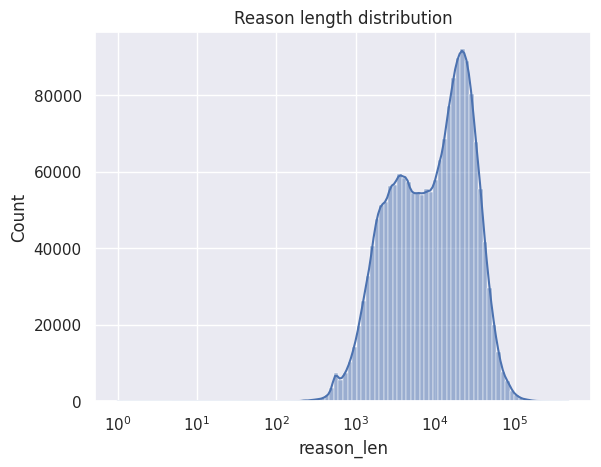

In [ ]:
ax = sns.histplot(reason_df.select(pl.col("reason_len")), x="reason_len", bins=100, kde=True, log_scale=True)
ax.set(title="Reason length distribution")
plt.show()

In [ ]:
# reason_df.select(pl.col("Reasons for judgment"), pl.col("reason_len")).sort("reason_len", descending=False).head(150).to_dicts()

In [ ]:
# check if missing reason correlate with linked cases
# df.filter(pl.col("Related docket numbers").is_not_null()).select(pl.col("Related docket numbers"), pl.col("Reasons for judgment")).head(50).to_dicts()

# 15. `The cited provisions`
* wszystkie linki do ISAP przechodzą weryfikacje (nie sprawdzałem, czy coś pod nimi faktycznie istnieje)
* jest sporo błędnych artykułów, z błedami typy:
    * brakujące częściowo dane
    * źle sparsowane (np. dziennik ustaw wpada do artykułu)

In [ ]:
get_null_count("The cited provisions")

null_count,null_ratio
u32,f64
429129,0.202968


[Text(0.5, 1.0, 'Cited provisions length distribution'), None]

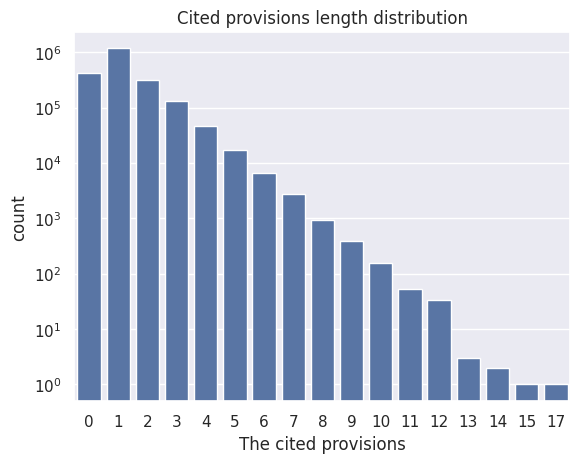

In [ ]:
ax = sns.barplot(
    data=df.select(pl.col("The cited provisions").list.len().value_counts(sort=True)).unnest(
        "The cited provisions"
    ),
    x="The cited provisions",
    y="count",
)
ax.set(title="Cited provisions length distribution", yscale="log")

In [ ]:
def is_valid_url(url):
    try:
        result = urlparse(url)
        return all([result.scheme, result.netloc])
    except ValueError:
        return False

In [ ]:
provisions = df.select(pl.col("id").alias("judgment_id"), pl.col("The cited provisions")).explode("The cited provisions").unnest("The cited provisions")
provisions.head()

judgment_id,Article,Journal of laws,Law,Link
str,str,str,str,str
"""/doc/BC8847077…","""art. 220 par.3…","""Dz.U. 2016 poz…","""Ustawa z dnia …","""http://isap.se…"
"""/doc/C8D885030…","""art. 151""","""Dz.U. 2019 poz…","""Ustawa z dnia …","""http://isap.se…"
"""/doc/C8D885030…","""art. 58 § 1""","""Dz.U. 2020 poz…","""Ustawa z dnia …","""http://isap.se…"
"""/doc/6447E5BA5…","""art. 67 ust. 2…","""Dz.U. 2002 nr …","""Obwieszczenie …","""http://isap.se…"
"""/doc/6447E5BA5…","""art. 32 ust. 1…","""Dz.U. 2001 nr …","""Obwieszczenie …","""http://isap.se…"


In [ ]:
are_all_links_valid = provisions.with_columns(pl.col("Link").map_elements(is_valid_url).alias("is_valid_url")).select(pl.col("is_valid_url").all()).item()
are_all_links_valid

True

In [ ]:
provisions.describe()

statistic,judgment_id,Article,Journal of laws,Law,Link
str,str,str,str,str,str
"""count""","""2962291""","""2457656""","""2533162""","""2530861""","""2483847"""
"""null_count""","""0""","""504635""","""429129""","""431430""","""478444"""
"""mean""",null,null,null,null,null
"""std""",null,null,null,null,null
"""min""","""/doc/000001239…","""& 12""","""An94000""","""""Rozporządzeni…","""http://isap.se…"
"""25%""",null,null,null,null,null
"""50%""",null,null,null,null,null
"""75%""",null,null,null,null,null
"""max""","""/doc/FFFFFE895…","""ž21 ust.1, §8…","""maja 1983 nr 1…","""Ósma Dyrektywa…","""http://isap.se…"


In [ ]:
# provisions.filter(pl.col("Article").is_not_null()).with_columns(
#     pl.col("Article").str.len_chars().alias("article_len")
# ).sort("Article", descending=True).head(30).to_dicts()

# 21. `Dissenting opinion`

In [ ]:
get_null_count("Dissenting opinion")

null_count,null_ratio
u32,f64
2112877,0.999342
